<a href="https://colab.research.google.com/github/AmmarBMS/Machine-Learning/blob/main/1BM22CS035_LAB_10_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

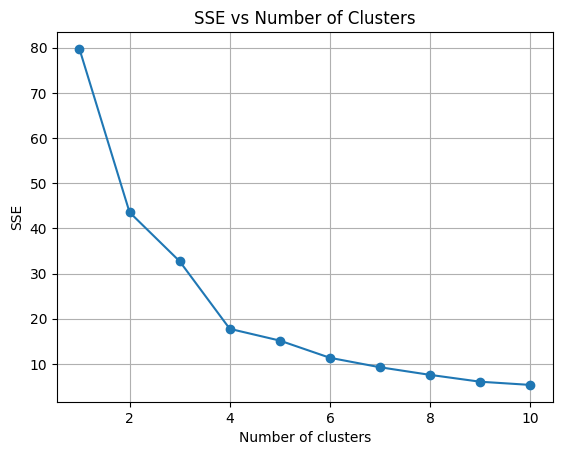

Adjusted Rand Index Score (for demonstration): 0.05


In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
names = [f"Person_{i}" for i in range(1, 51)]
ages = np.random.randint(20, 60, size=50)
incomes = np.random.randint(30000, 120000, size=50)

df = pd.DataFrame({
    "Name": names,
    "Age": ages,
    "Income": incomes
})

# Save to CSV
df.to_csv("income.csv", index=False)

# Step 2: Load the data
data = pd.read_csv("income.csv")

# Step 3: Preprocess (Drop 'Name', scale 'Age' and 'Income')
features = data[["Age", "Income"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Train-test split
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

# Step 5: Elbow Method for optimal clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train)
    sse.append(km.inertia_)

plt.plot(k_range, sse, marker='o')
plt.title("SSE vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

# Step 6: Choose number of clusters (e.g., 3), train and predict
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
predictions = kmeans.predict(X_test)

# Note: In unsupervised learning, accuracy isn't well-defined because we don't have true labels.
# We'll just show how to use predict and compute adjusted_rand_score on synthetic labels.
# Fake labels for demonstration (not realistic, only for illustrating scoring usage)
fake_labels = np.random.randint(0, 3, size=len(X_test))

# Use adjusted rand index for clustering evaluation
score = adjusted_rand_score(fake_labels, predictions)
print("Adjusted Rand Index Score (for demonstration):", round(score, 2))
